In [301]:
# Importer les librairies nécessaires 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
color = ['teal', 'orchid','#a7a7a7','#aec7e8','#9467bd','#EDE862']

#  Traitement de données 

In [302]:
# Decouvertes de données 
dossier_actuel = os.getcwd()
chemin_fichier = os.path.join(dossier_actuel, 'HR-employee-db.csv')
data = pd.read_csv(chemin_fichier) # Lire le fichier CSV 

In [303]:
# Afficher la table 
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Suppression des colonnes indésirables 

In [304]:
data.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)

In [332]:
# Comprendre les détails statistiques de notre base de données 
data.describe().style.background_gradient(cmap='viridis')

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [323]:
# Verification des colones numériques 
numeric = data.select_dtypes(exclude='O')
numeric.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [324]:
# Verification des colonnes types objects 
obj = data.select_dtypes(include='O')
obj.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [325]:
# Affiche les structures des tables 
print(data.shape)
print(numeric.shape)
print(obj.shape)

(1470, 31)
(1470, 23)
(1470, 8)


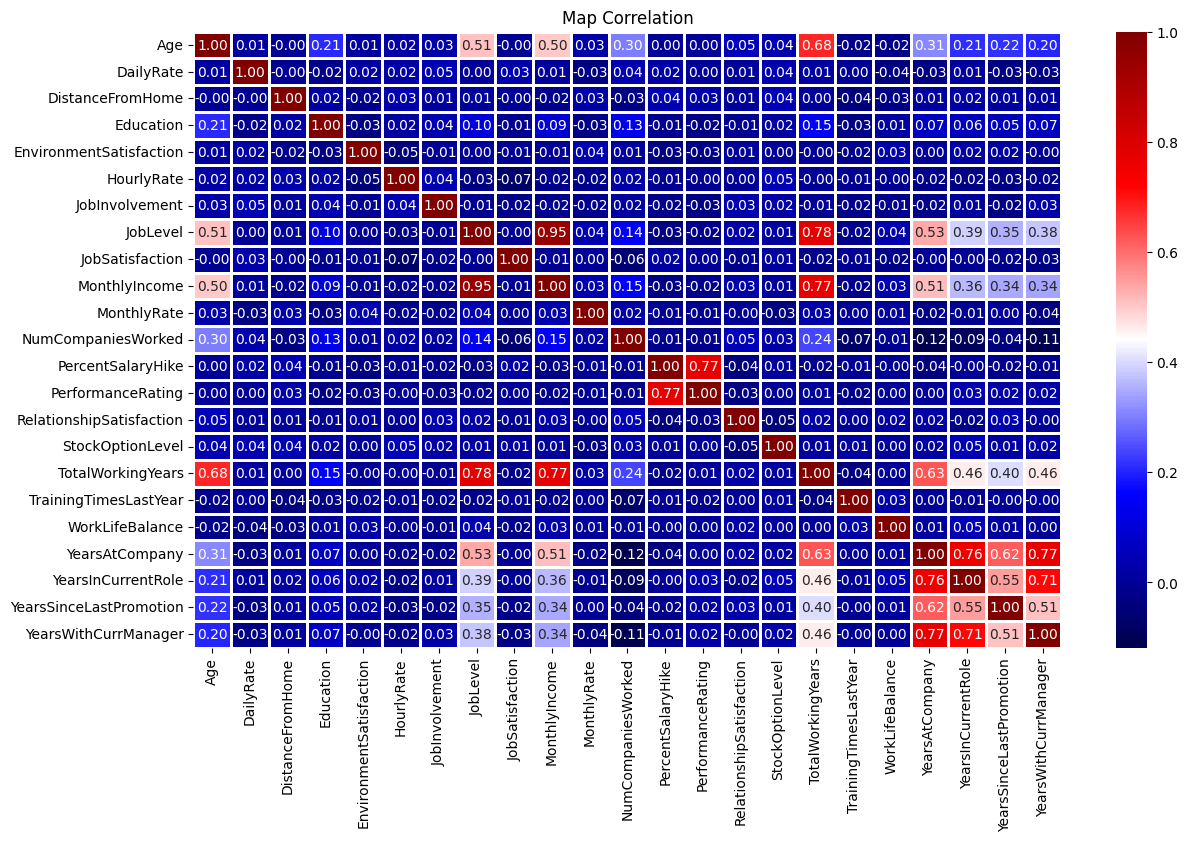

In [327]:
# Verification des corrélation matrix 
plt.figure(figsize=(14,8))
sns.heatmap(numeric.corr(),annot=True,cmap='seismic',fmt='.2f',linewidths=1)
plt.title('Map Correlation')
plt.show()

# Nettoyage de données 

Vérification des valeurs null dans le datasets 

In [330]:
# Verification des valeurs null 
print(data.shape) 
print(data.duplicated().sum()) # Verifier les doublons 

table_info = pd.DataFrame({
    'Unique':data.nunique(),
    'Null':data.isna().sum(),
    'NullPercent':data.isna().sum() / len(data),
    'Type':data.dtypes.values
})
print(table_info)

(1470, 31)
0
                          Unique  Null  NullPercent    Type
Age                           43     0          0.0   int64
Attrition                      2     0          0.0  object
BusinessTravel                 3     0          0.0  object
DailyRate                    886     0          0.0   int64
Department                     3     0          0.0  object
DistanceFromHome              29     0          0.0   int64
Education                      5     0          0.0   int64
EducationField                 6     0          0.0  object
EnvironmentSatisfaction        4     0          0.0   int64
Gender                         2     0          0.0  object
HourlyRate                    71     0          0.0   int64
JobInvolvement                 4     0          0.0   int64
JobLevel                       5     0          0.0   int64
JobRole                        9     0          0.0  object
JobSatisfaction                4     0          0.0   int64
MaritalStatus              

In [328]:
# Autres methodes pour verifier les valeurs null 
valeurs_nul=data.isna().sum()
total=np.product(data.shape)
total_valeur_manquant=null_values.sum()
pourcentage_valeurs_manquant=(total_valeur_manquant/total)*100
print(f'Notre données contients en {percentage_missing_values} % de valeurs null')

Notre données contients en 0.0 % de valeurs null


In [329]:
# Autres methodes pour verifier les doublons 
doublons=data.duplicated().sum()
print(f'Ils y a {doublons} velurs dupliqués et nous allons les suprimmer')

Ils y a 0 velurs dupliqués et nous allons les suprimmer


In [ ]:
# Au cas ou il en aurra 
data=data.drop.duplicated()
data_clean=data.duplicated().sum()
print(f'Ils y a {duplicate} velurs dupliqués et nous allons les suprimmer')

<Axes: >

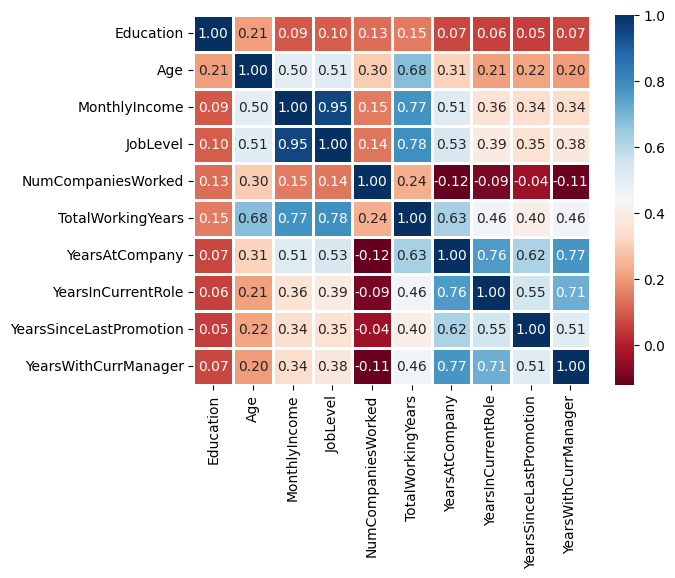

In [313]:
# Verification des corrélation entre les colonnes 
colonnes = ['Education','Age','MonthlyIncome','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
sns.heatmap(data[colonnes].corr(),annot=True,cmap='RdBu',fmt='.2f',linewidths=1)

# Analyse Exploratoire de Données 

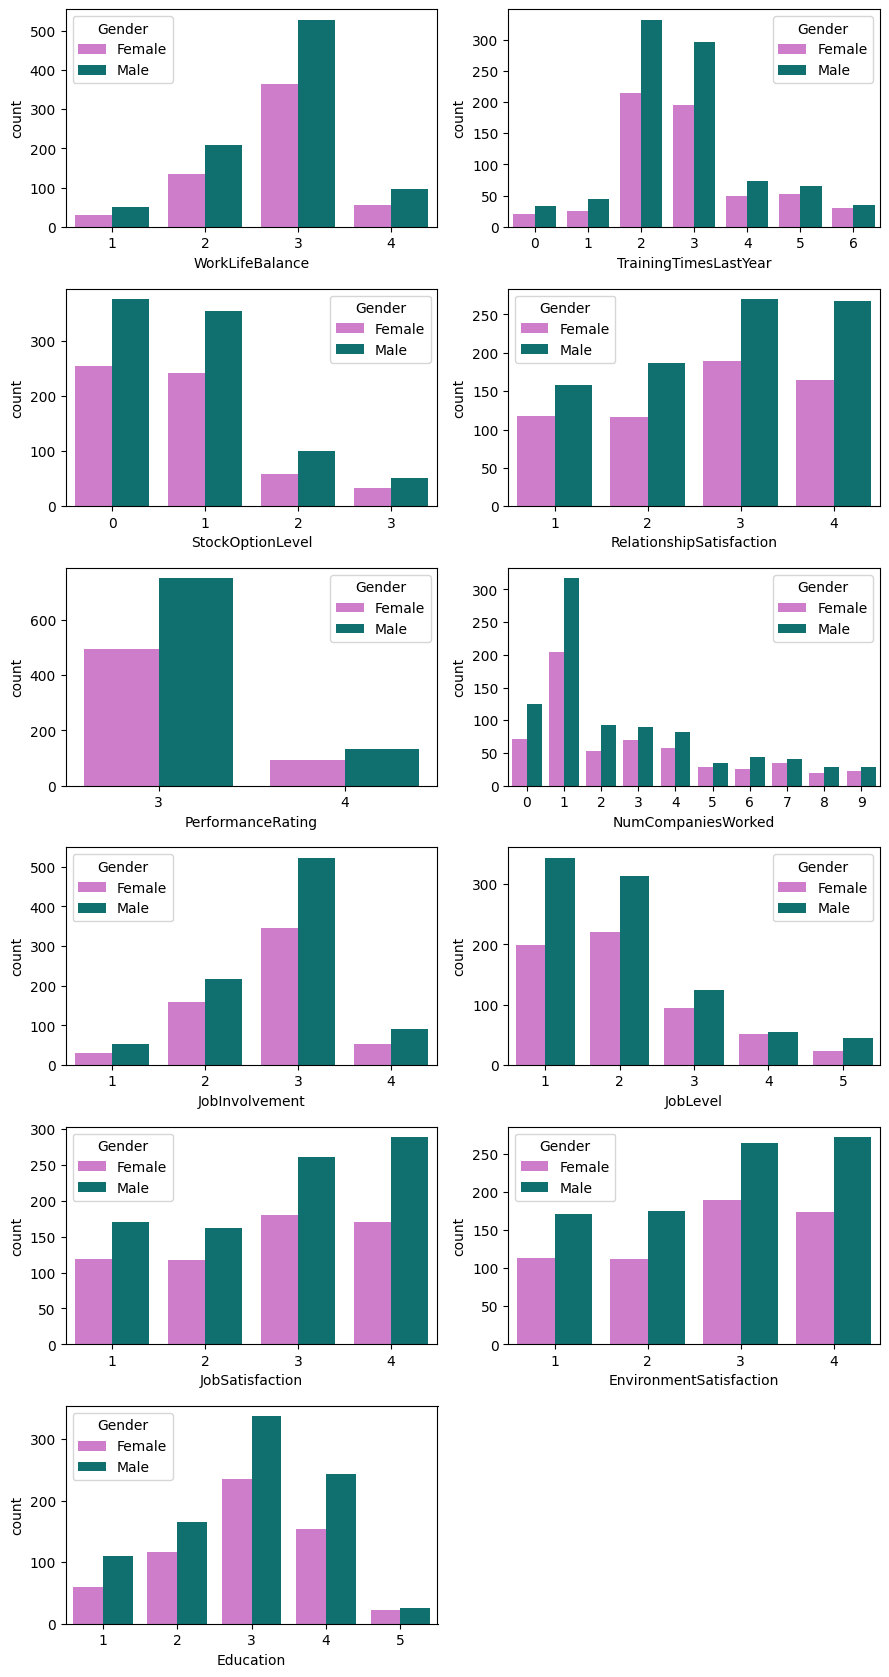

In [314]:
colonnes = ['WorkLifeBalance','TrainingTimesLastYear','StockOptionLevel',
    'RelationshipSatisfaction','PerformanceRating','NumCompaniesWorked',
   'JobInvolvement', 'JobLevel', 'JobSatisfaction',
   'EnvironmentSatisfaction','Education']
plt.figure(figsize=(9,36))
for i,col in enumerate(colonnes):
    axes = plt.subplot(13,2, i + 1)
    sns.countplot(x=data[col], hue=data['Gender'], palette=['orchid', 'teal'])
plt.tight_layout()
plt.show()

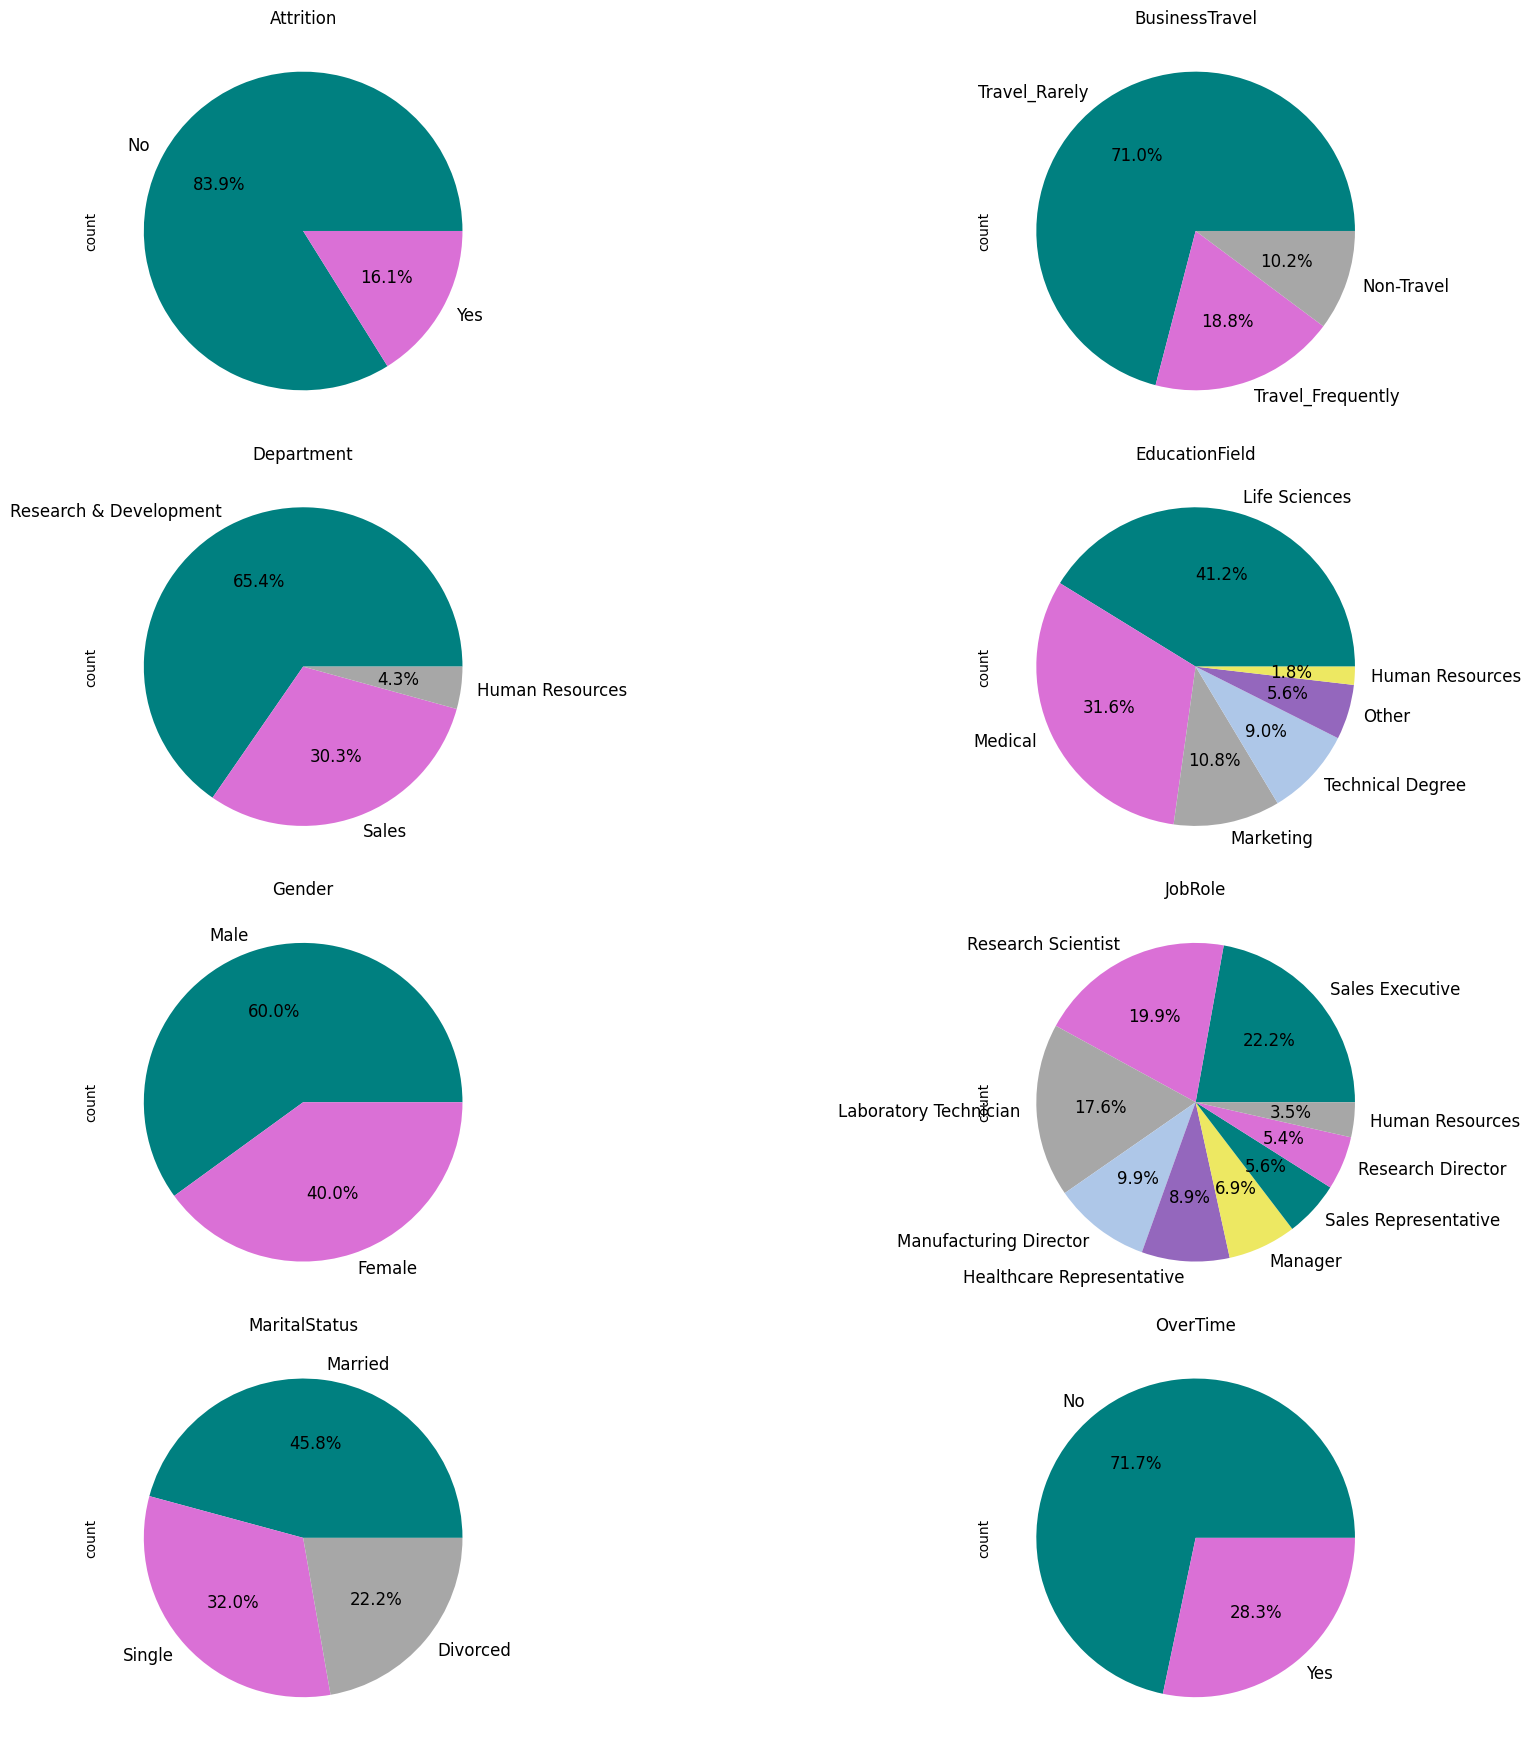

In [315]:
plt.figure(figsize=(18,35))
for i,col in enumerate(cat):
    axes = plt.subplot(8,2, i + 1)
    data[col].value_counts().plot.pie(autopct='%.1f%%', colors=color,textprops={'size':12,'color':'black'})
    plt.title(col)
plt.tight_layout()
plt.show()

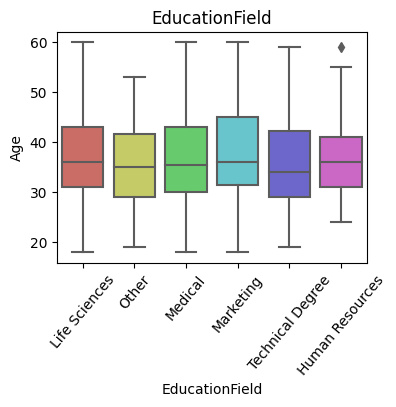

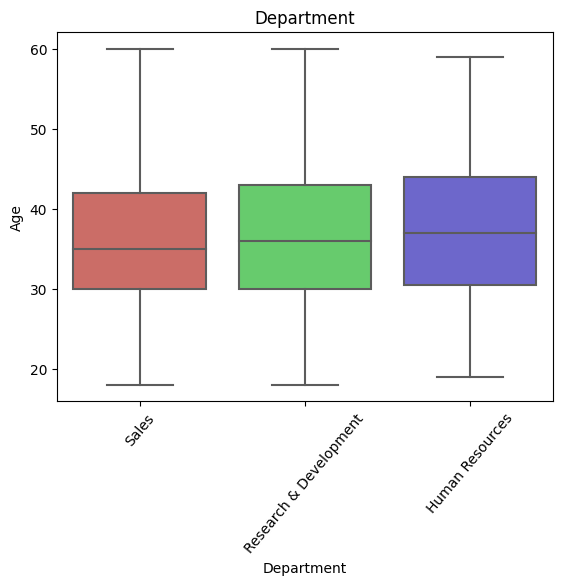

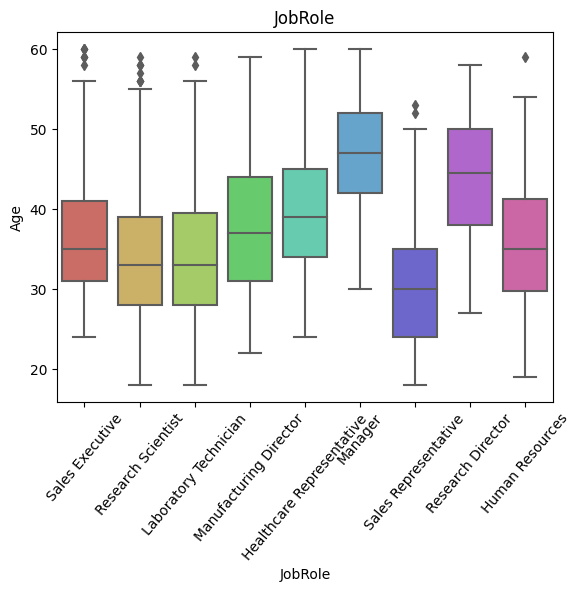

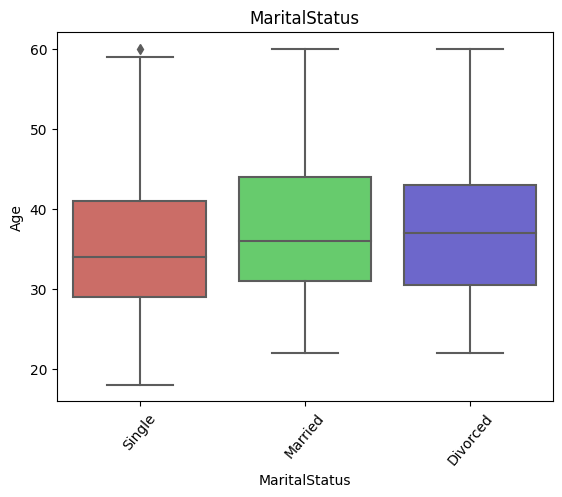

In [331]:
colonnes_1 = ['EducationField', 'Department', 'JobRole', 'MaritalStatus']
plt.figure(figsize=(4,3))
for i, col in enumerate(colonnes_1):
    sns.boxplot(data=data,x=data[col],y='Age',palette='hls')
    plt.title(col)
    plt.xlabel(col)
    plt.xticks(rotation=50)
    plt.ylabel('Age')
    plt.show()

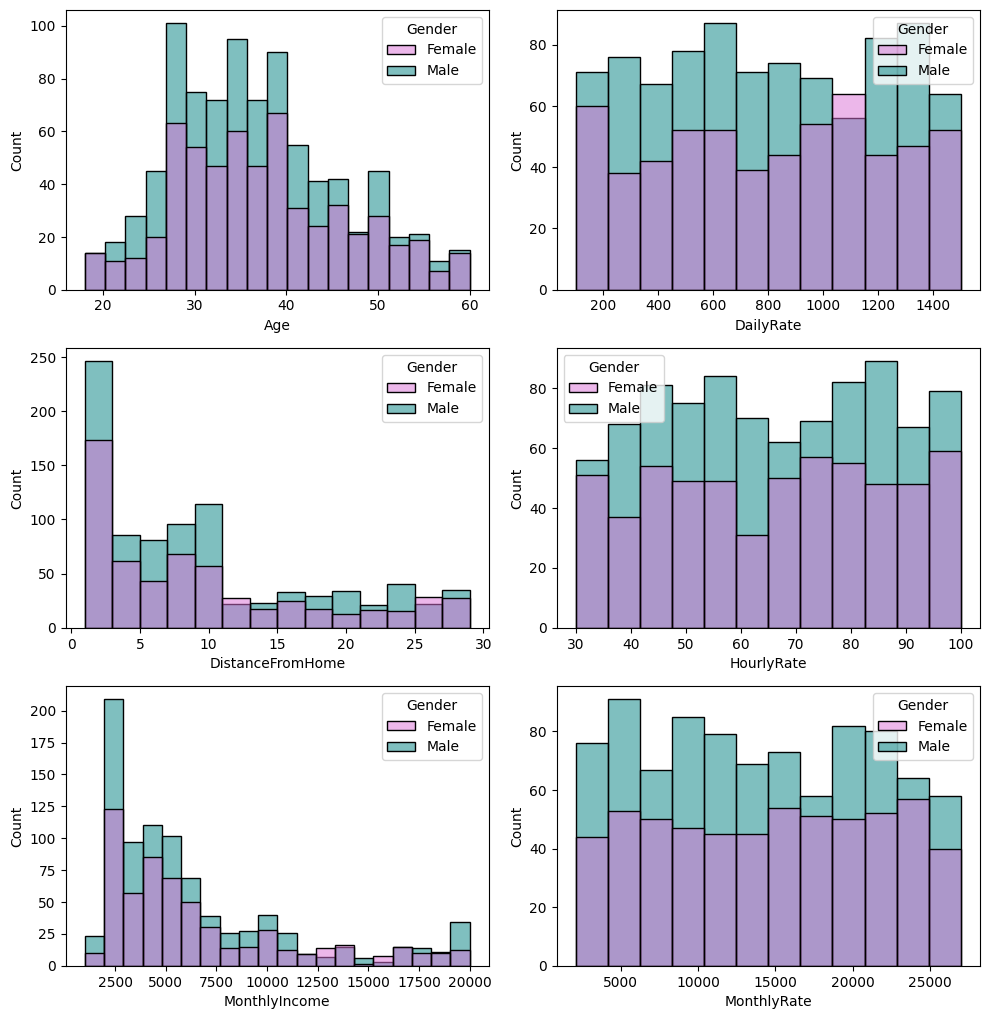

In [320]:
histogrm = ['Age', 'DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
           'MonthlyRate']

plt.figure(figsize=(10,20))
for i,col in enumerate(histogrm):
    axes = plt.subplot(6,2, i + 1)
    sns.histplot(x=data[col], hue=data['Gender'], palette=['orchid', 'teal'])
plt.tight_layout()
plt.show()

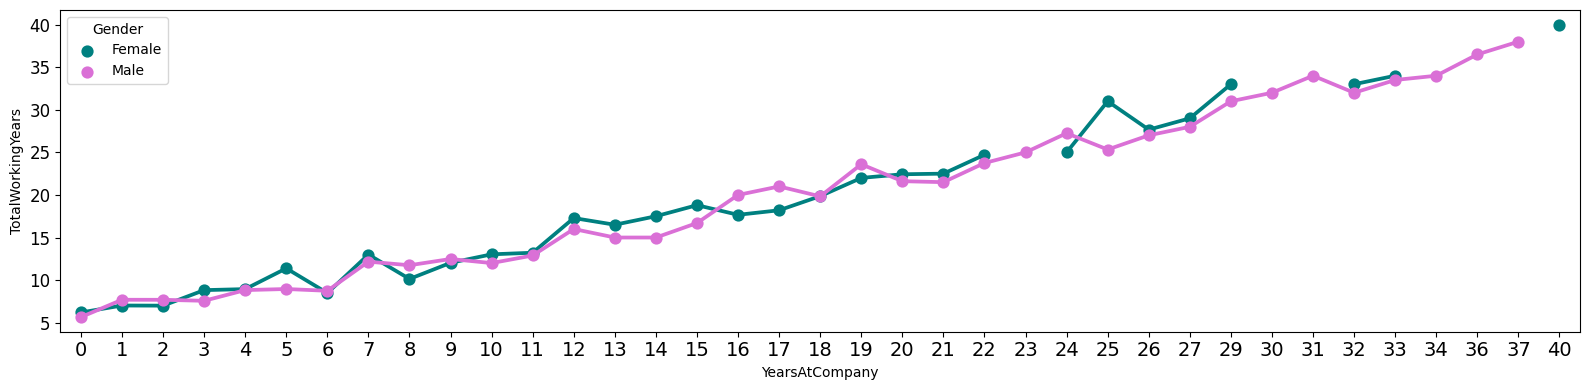

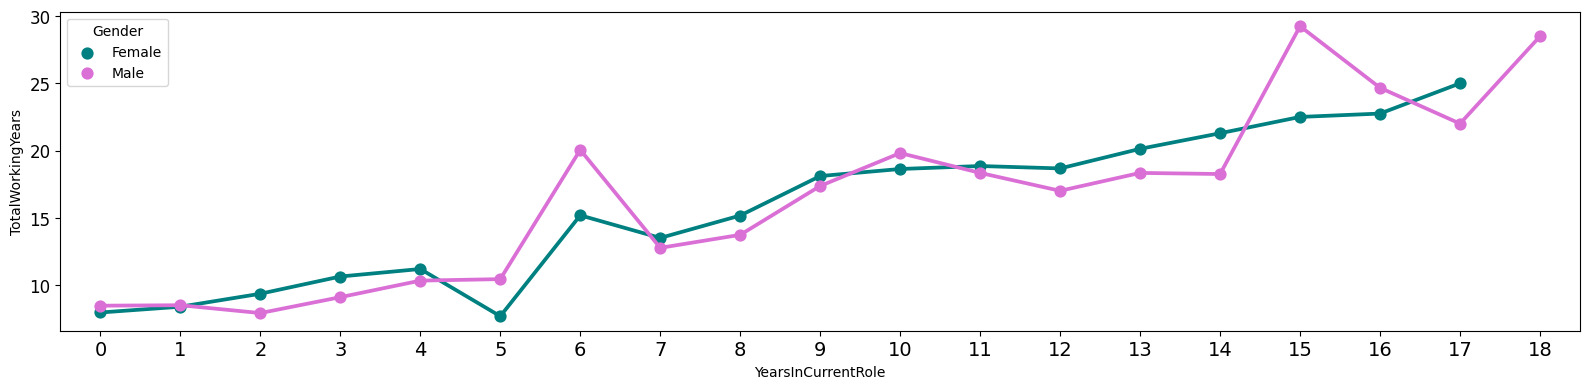

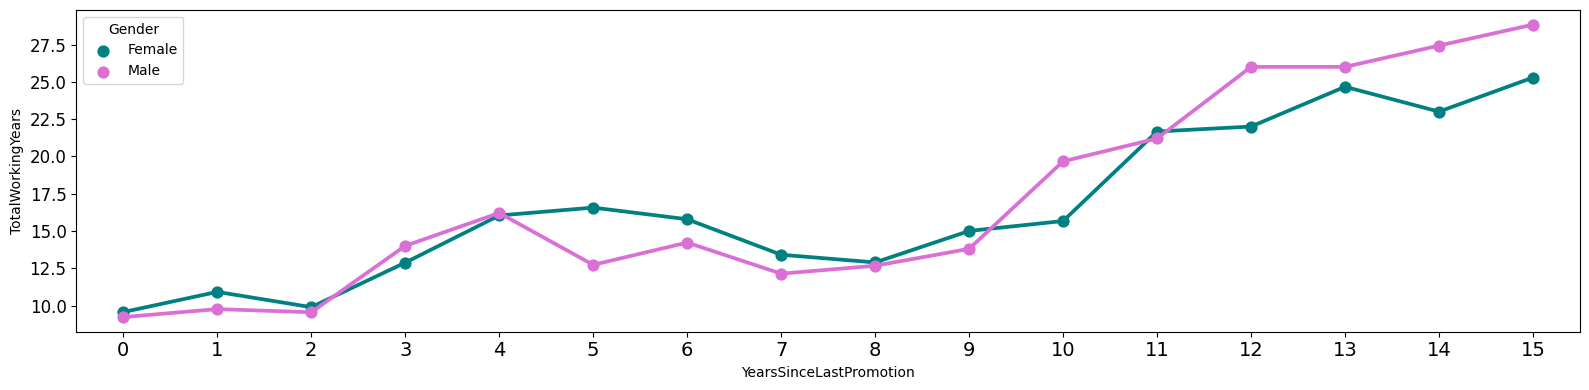

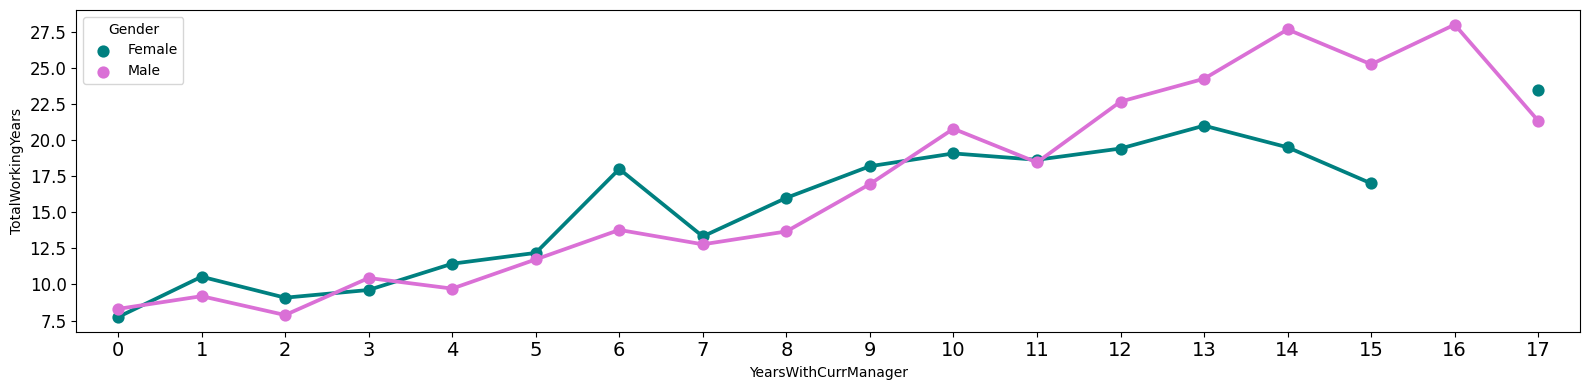

In [318]:
# Correlation: Total des années de travail 
colonnes = ['YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

for i in colonnes :
    fig, axes = plt.subplots(figsize=(16,4))
    sns.pointplot(x=data[i], y=data['TotalWorkingYears'], hue=data['Gender'], palette=color, ci=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

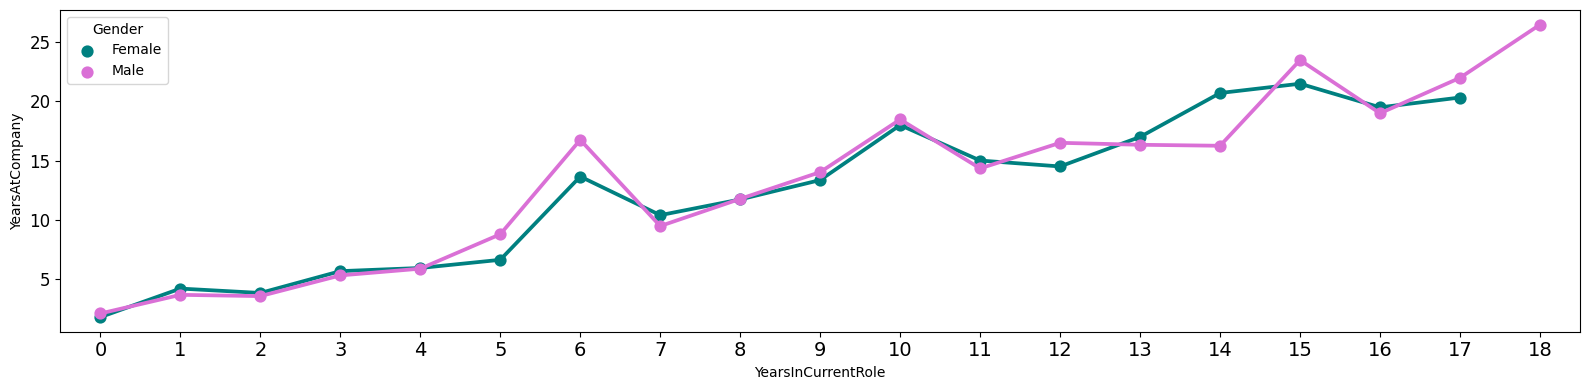

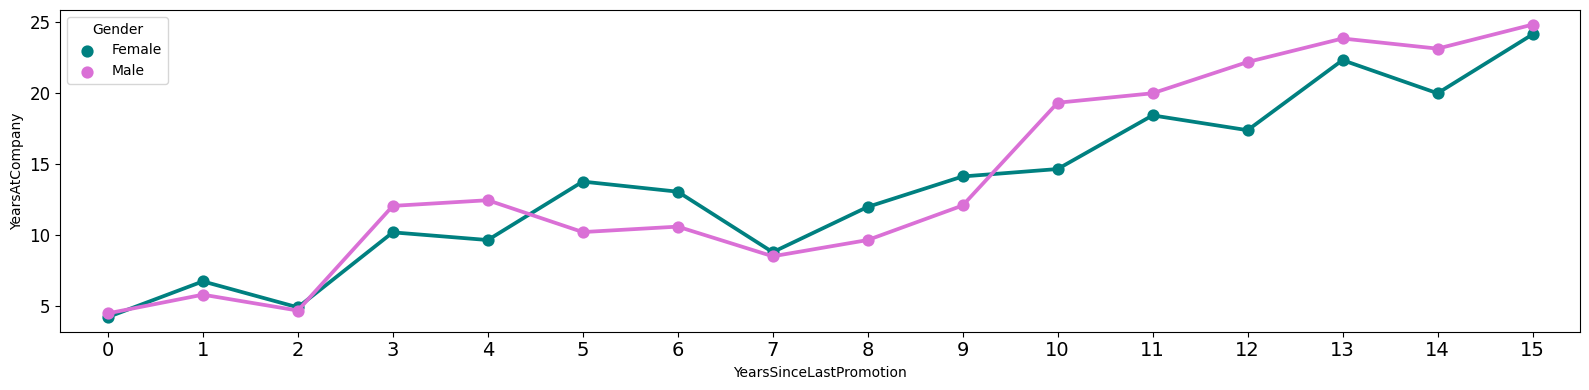

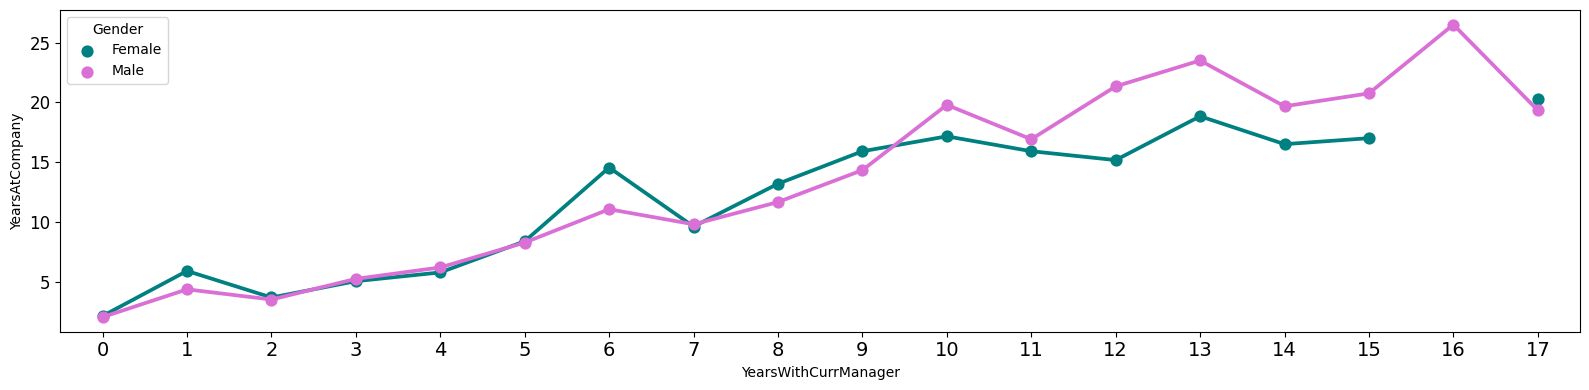

In [319]:
# Correlation: Années dans l'entreprise 
colonnes = ['YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

for i in colonnes:
    fig, axes = plt.subplots(figsize=(16,4))
    sns.pointplot(x=data[i], y=data['YearsAtCompany'], hue=data['Gender'], palette=color, ci=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
# Correlation: Nombres d'années sur le travail actuel 
colonnes = ['YearsSinceLastPromotion','YearsWithCurrManager']

for i in colonnes :
    fig, axes = plt.subplots(figsize=(16,4))
    sns.pointplot(x=data[i], y=data['YearsInCurrentRole'], hue=data['Gender'], palette=color, ci=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

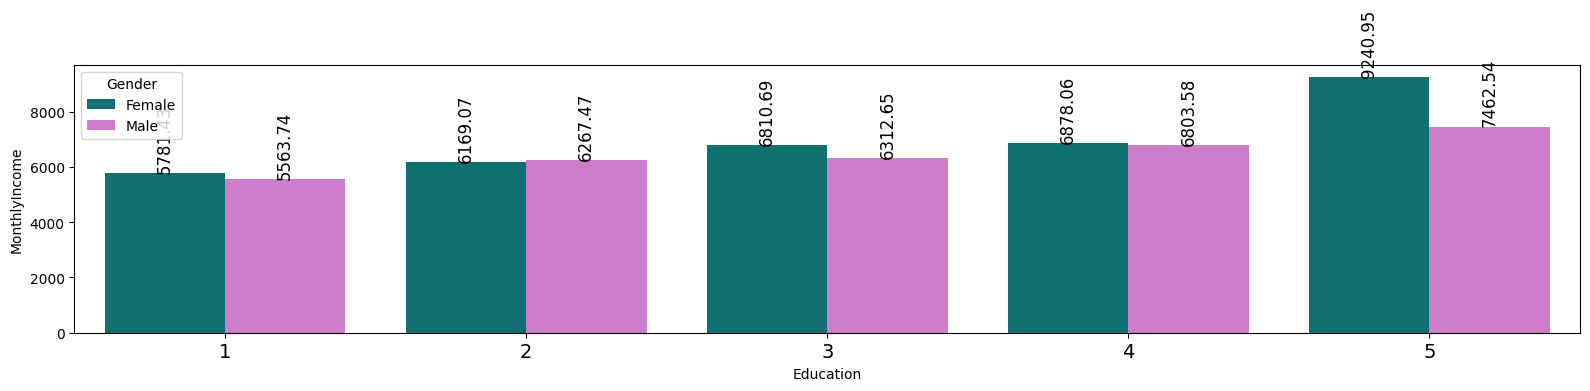

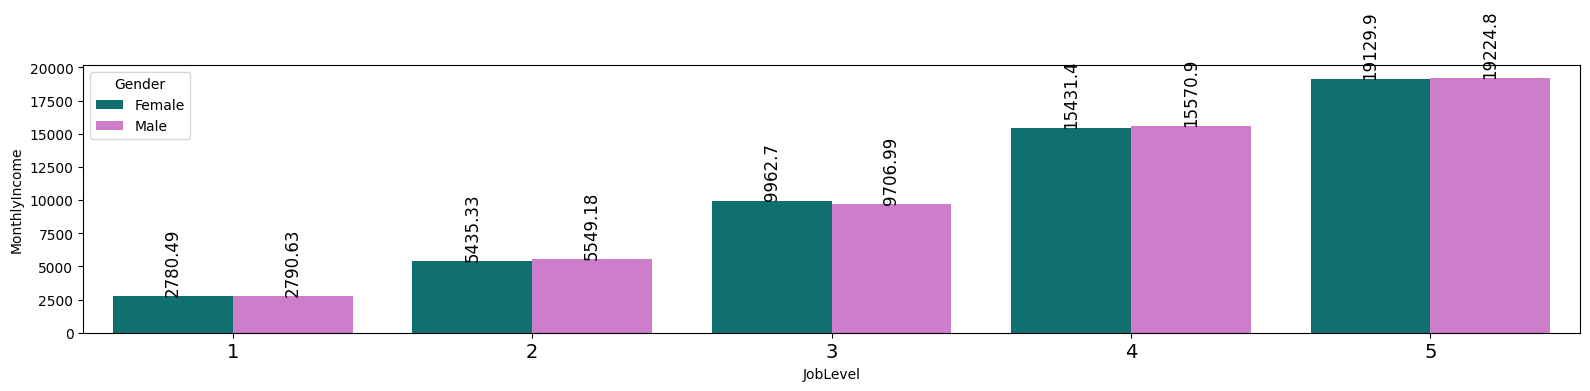

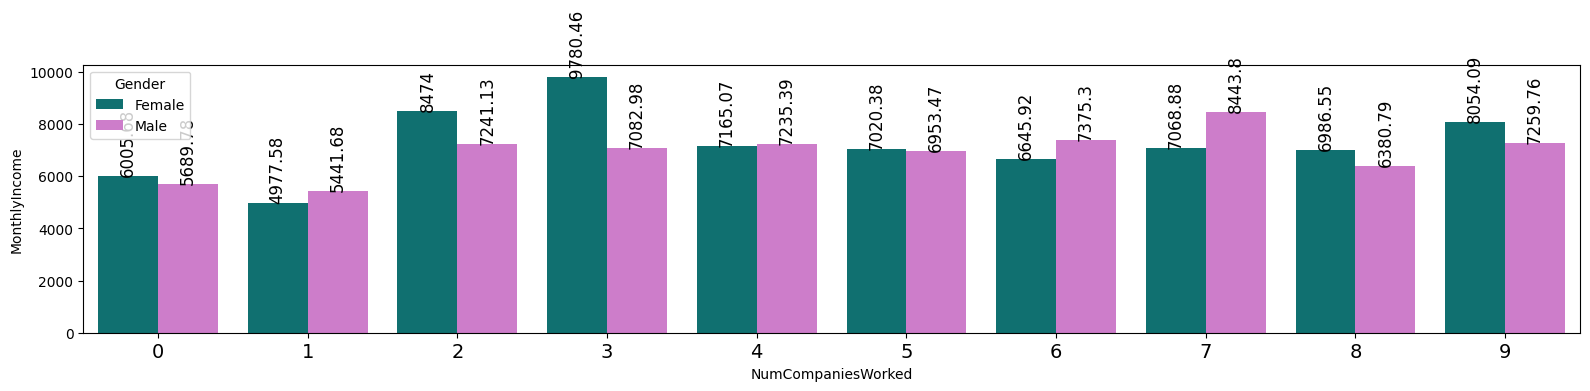

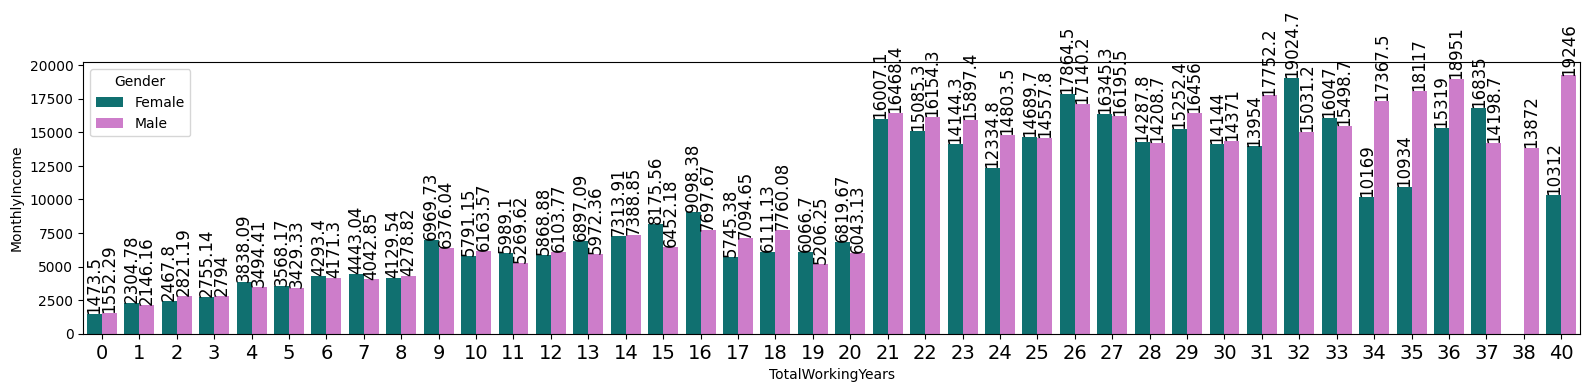

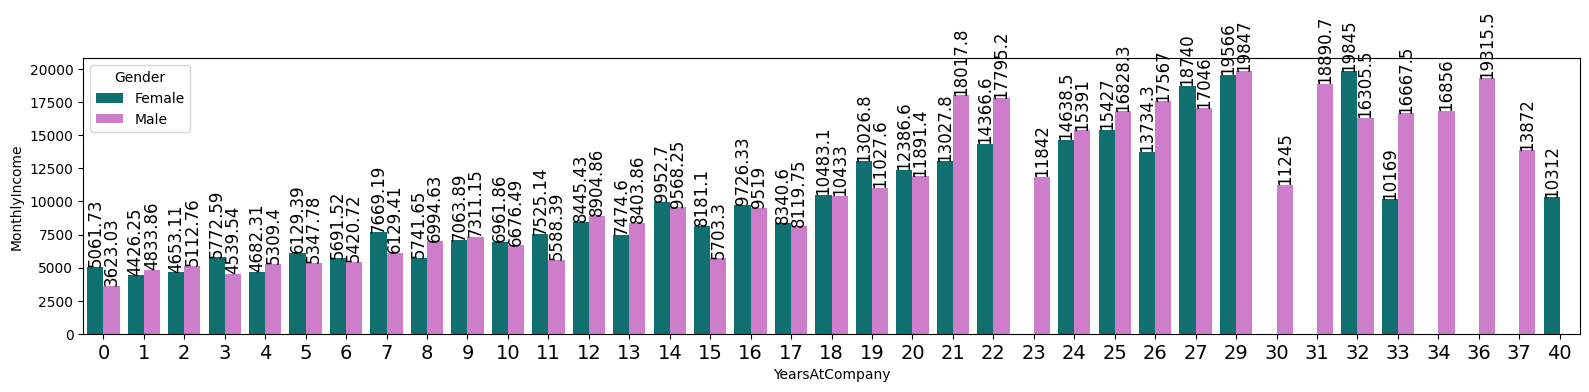

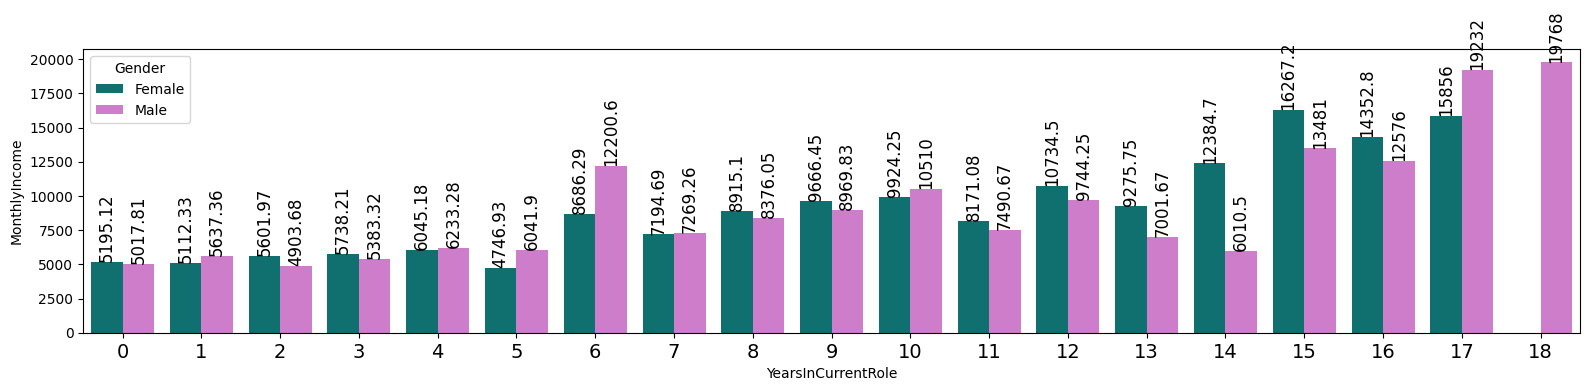

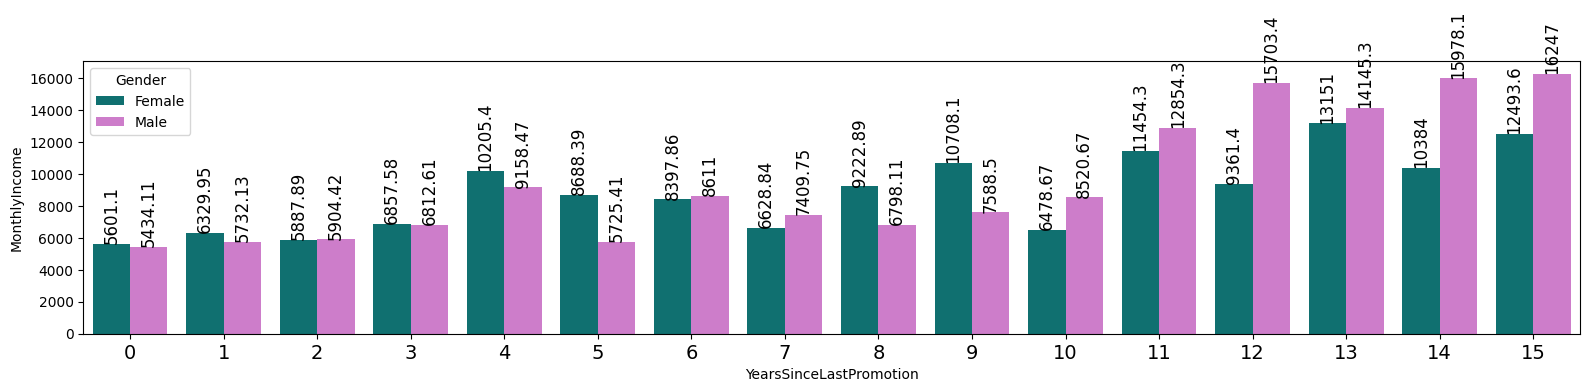

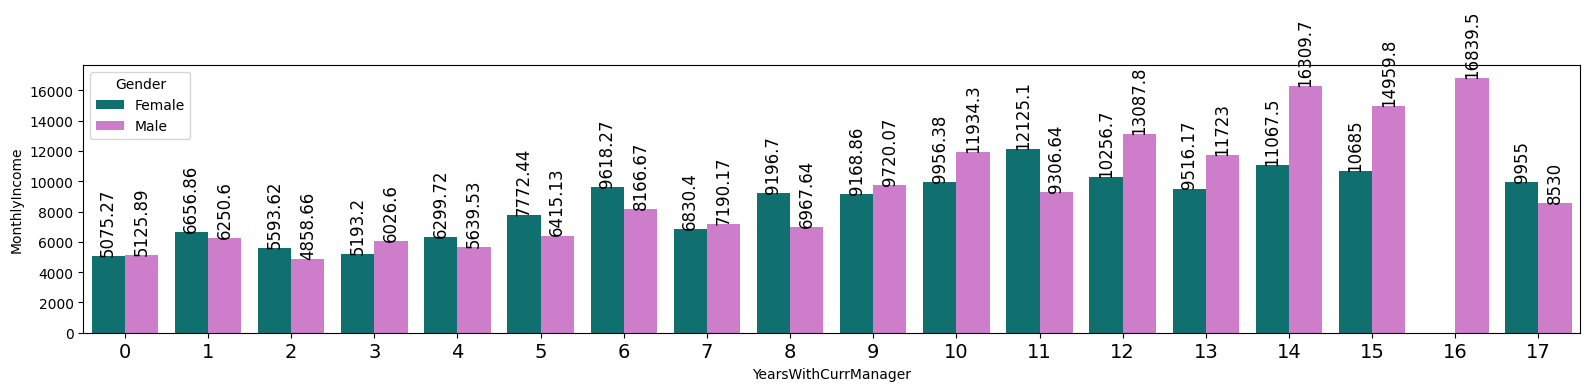

In [322]:
# Revenu mensuel pour les années de travail
colonnes = ['Education','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
           'YearsInCurrentRole', 'YearsSinceLastPromotion',
           'YearsWithCurrManager']
for i in colonnes:
    fig, axes = plt.subplots(figsize=(16,4))
    sns.barplot(x=data[i], y=data['MonthlyIncome'], hue=data['Gender'], palette=color, ci=None)
    plt.xticks(fontsize=14)
    for cont in axes.containers:
        axes.bar_label(cont,rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Salaire mensuel par sexe 
colonnes = ['Department','EducationField','Gender','MaritalStatus','BusinessTravel','JobRole']

for i in colonnes :
    fig, axes = plt.subplots(figsize=(16,6))
    sns.barplot(x=data[i], y=data['MonthlyIncome'], hue=data['Gender'], palette=color, ci=None)
    plt.xticks(rotation=50,fontsize=14)
    for cont in axes.containers:
        axes.bar_label(cont,rotation=30, fontsize=14)
    plt.tight_layout()
    plt.show()

In [ ]:
# Salaire mensuel par situation matrimoniale 
colonnes = ['Gender','Department','EducationField','Gender','BusinessTravel','JobRole']
for i in colonnes:
    fig, axes = plt.subplots(figsize=(16,6))
    sns.barplot(x=data[i], y=data['MonthlyIncome'], hue=data['MaritalStatus'], palette=color, ci=None)
    plt.xticks(rotation=50,fontsize=14)
    for cont in axes.containers:
        axes.bar_label(cont,rotation=30,fontsize=14)
    plt.tight_layout()
    plt.show()